# Probability Mass Function

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
preg = pd.read_csv("./2002FemPreg.tsv", sep='\t')
live = preg[preg.outcome == 1]

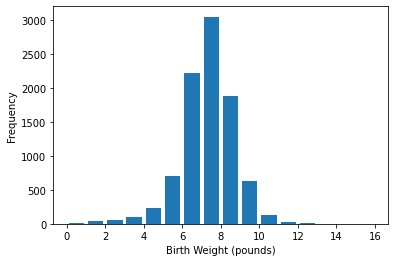

In [9]:
plt.hist(live["birthwgt_lb"], rwidth=0.8, label="birthwgt_lb",
        bins=range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max()+2)))
plt.xlabel("Birth Weight (pounds)")
plt.ylabel("Frequency")
plt.show()
plt.close()

In [10]:
hist = {key : val for key, val in enumerate(np.bincount(live["birthwgt_lb"].dropna()))}

In [11]:
hist

{0: 8,
 1: 40,
 2: 53,
 3: 98,
 4: 229,
 5: 697,
 6: 2223,
 7: 3049,
 8: 1889,
 9: 623,
 10: 132,
 11: 26,
 12: 10,
 13: 3,
 14: 3,
 15: 1}

In [13]:
n = sum(hist.values())
pmf = hist.copy()
for x, freq in hist.items():
    pmf[x] = freq / n

In [14]:
pmf

{0: 0.0008806693086745927,
 1: 0.004403346543372964,
 2: 0.005834434169969176,
 3: 0.01078819903126376,
 4: 0.025209158960810215,
 5: 0.07672831351827389,
 6: 0.24471598414795245,
 7: 0.3356450902686041,
 8: 0.2079480405107882,
 9: 0.06858212241303391,
 10: 0.01453104359313078,
 11: 0.0028621752531924264,
 12: 0.001100836635843241,
 13: 0.00033025099075297226,
 14: 0.00033025099075297226,
 15: 0.00011008366358432408}

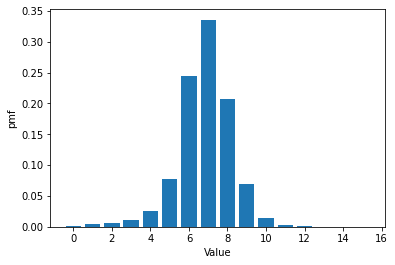

In [16]:
plt.bar(pmf.keys(), pmf.values())   # bar plot에서 앞이 x축 값, 뒤가 y축 값
plt.xlabel("Value")
plt.ylabel("pmf")
plt.show()
plt.close()

In [17]:
print(sum(pmf.values()))

1.0


In [21]:
values = [1, 2, 2, 3, 5]
pmf = {key : val/len(values) for key, val in enumerate(np.bincount(values)) if val != 0}
pmf

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [22]:
pmf[2] += 0.2

In [24]:
# normalize 진행
tot = sum(pmf.values())
pmf = {key : val/tot for key, val in pmf.items()}

In [25]:
sum(pmf.values())

1.0000000000000002

In [26]:
pmf[2] *= 2

In [27]:
tot = sum(pmf.values())
pmf = {key : val/tot for key, val in pmf.items()}
pmf

{1: 0.11111111111111109,
 2: 0.6666666666666666,
 3: 0.11111111111111109,
 5: 0.11111111111111109}

In [29]:
sum(pmf.values())   # 1과 거의 동일

0.9999999999999998

In [30]:
pmf = {key : val/len(live["prglngth"].dropna()) for key, val in enumerate(np.bincount(live["prglngth"].dropna()))}

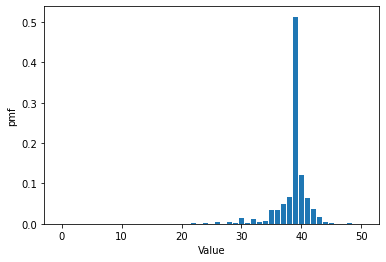

In [31]:
plt.bar(pmf.keys(), pmf.values())
plt.xlabel("Value")
plt.ylabel("pmf")
plt.show()
plt.close()

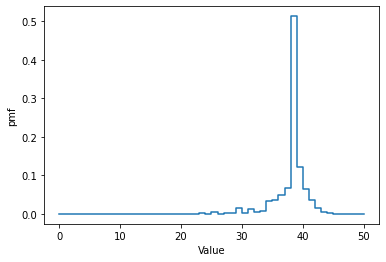

In [32]:
# step function 사용하기 위해서는 list type으로 형변환 한 번 시켜줘야 함
plt.step(list(pmf.keys()), list(pmf.values()))
plt.xlabel("Value")
plt.ylabel("pmf")
plt.show()
plt.close()

In [33]:
first = live[live.birthord == 1]
others = live[live.birthord > 1]
first_pmf = {key: val/len(first["prglngth"].dropna()) for key, val in enumerate(np.bincount(first["prglngth"].dropna()))}
others_pmf = {key: val/len(others["prglngth"].dropna()) for key, val in enumerate(np.bincount(others["prglngth"].dropna()))}

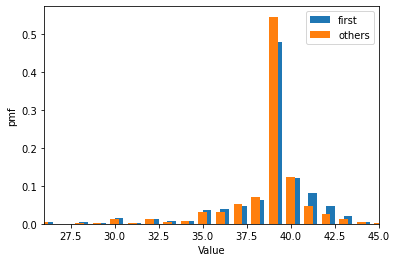

In [40]:
plt.bar(first_pmf.keys(), first_pmf.values(), width=0.5, align="edge", label="first")
plt.bar(others_pmf.keys(), others_pmf.values(), width=0.5, align="center", label="others")
plt.xlabel("Value")
plt.ylabel("pmf")
plt.xlim(26, 45)
plt.legend()    # 범례 나타내기
plt.show()
plt.close()

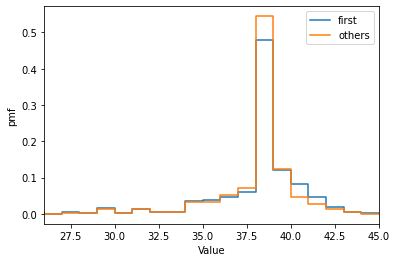

In [41]:
# 위의 결과를 step function으로 나타냄
plt.step(list(first_pmf.keys()), list(first_pmf.values()), label="first")
plt.step(list(others_pmf.keys()), list(others_pmf.values()), label="others")
plt.xlabel("Value")
plt.ylabel("pmf")
plt.legend()
plt.xlim(26, 45)
plt.show()
plt.close()

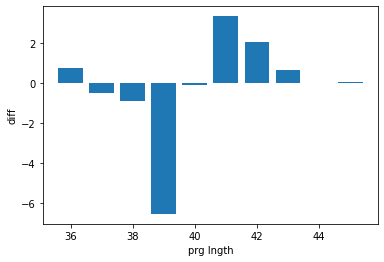

In [42]:
weeks = range(36, 46)
diffs = []
for week in weeks:
    p1 = first_pmf[week]
    p2 = others_pmf[week]
    diff = 100 * (p1-p2)
    diffs.append(diff)

plt.bar(weeks, diffs)
plt.xlabel("prg lngth")
plt.ylabel("diff")
plt.show()
plt.close()

# Cumulative Distribute Function

In [68]:
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord > 1]

In [69]:
firsts_wgt_dropna = firsts.totalwgt_lb.dropna()
others_wgt_dropna = others.totalwgt_lb.dropna()

In [70]:
# 조밀하게 보기 위해... 히스토그램 그리기
firsts_hist, firsts_bins = np.histogram(firsts_wgt_dropna, bins=np.arange(0, 16, 0.05))   # bins : 전체를 몇 개로 쪼갤 것인지.
others_hist, others_bins = np.histogram(others_wgt_dropna, bins=np.arange(0, 16, 0.05))   # bins : 전체를 몇 개로 쪼갤 것인지.
firsts_pmf = {key : val/len(firsts_wgt_dropna) for key, val in zip(firsts_bins, firsts_hist)}
others_pmf = {key : val/len(others_wgt_dropna) for key, val in zip(others_bins, others_hist)}

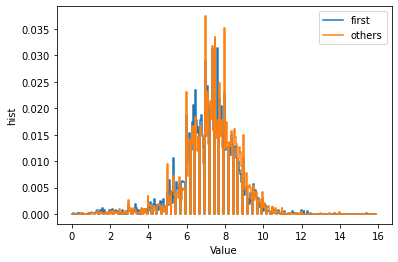

In [72]:
plt.step(list(firsts_pmf.keys()), list(firsts_pmf.values()), label="first")
plt.step(list(others_pmf.keys()), list(others_pmf.values()), label="others")
plt.xlabel("Value")
plt.ylabel("hist")
plt.legend()
plt.show()
plt.close()

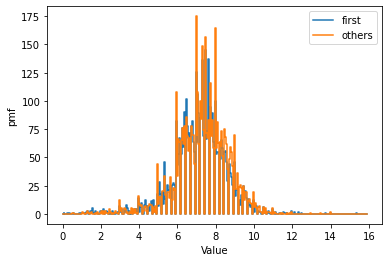

In [74]:
plt.step(firsts_bins[:-1], firsts_hist, label="first")
plt.step(others_bins[:-1], others_hist, label="others")
plt.xlabel("Value")
plt.ylabel("pmf")
plt.legend()
plt.show()
plt.close()

In [75]:
def PercentileRank(scores, your_score): # 값을 주면 rank를 return
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100 * count / len(scores)
    return percentile_rank

In [80]:
t = [55, 66, 77, 88, 99]
PercentileRank(t, 88)   

80.0

In [82]:
# 이렇게 하면 짱느림
def Percentile(scores, percentile_rank):    # rank 주면 값을 주는 함수
    for score in sorted(scores):
        if PercentileRank(scores, score) >= percentile_rank:
            return score

Percentile(t, 45)

77

In [84]:
# 위의 Percentile보다 조금 더 빠르게 처리하기 위한 함수
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100    # index 값 알면 rank 바로 구할 수 있음
    return scores[index]

Percentile2(t, 45)  # 위랑 결과 조금 달라도 답은 같음

66

In [85]:
# PDF는 0부터 1까지, Percentile은 0부터 100까지 줌
def evalCDF(sample, x):
    count = 0.0
    for value in sorted(sample):
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

def getValCDF(sample, cdf_value):
    for score in sorted(sample):
        if evalCDF(sample, score) >= cdf_value:
            return score

def evalCDFCDF(cdf, target_val):
    for val, score in sorted(cdf.items()):
        if val >= target_val:
            return score

def getValCDFCDF(cdf, cdf_value):
    for val, score in sorted(cdf.items):
        if score >= cdf_value:
            return val


In [87]:
t = [1, 2, 2, 3, 5]
print(evalCDF(t, 3))

0.8


In [93]:
# CDF(x) : x보다 작은 값들의 pmf 합

def pmf2cdf(pmf_dict):
    cdf_dict = {}
    now = 0.0
    for k, v in sorted(pmf_dict.items()):
        now += v
        cdf_dict[k] = now
    return cdf_dict

In [94]:
# 조밀하게 보기 위해... 히스토그램 그리기
firsts_hist, firsts_bins = np.histogram(firsts_wgt_dropna, bins=np.arange(0, 16, 0.05))   # bins : 전체를 몇 개로 쪼갤 것인지.
others_hist, others_bins = np.histogram(others_wgt_dropna, bins=np.arange(0, 16, 0.05))   # bins : 전체를 몇 개로 쪼갤 것인지.
live_wgt_dropna = live.totalwgt_lb.dropna()
live_hist, live_bins = np.histogram(live_wgt_dropna, bins = np.arange(0, 16, 0.05))

firsts_pmf = {key : val/len(firsts_wgt_dropna) for key, val in zip(firsts_bins, firsts_hist)}
others_pmf = {key : val/len(others_wgt_dropna) for key, val in zip(others_bins, others_hist)}
live_pmf = {key : val/len(live_wgt_dropna) for key, val in zip(live_bins, live_hist)}

firsts_cdf = pmf2cdf(firsts_pmf)
others_cdf = pmf2cdf(others_pmf)
live_cdf = pmf2cdf(live_pmf)


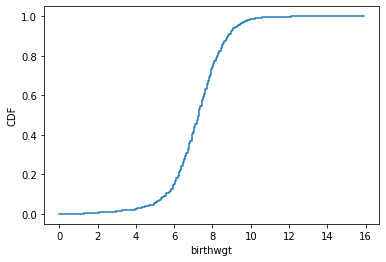

In [95]:
plt.step(list(live_cdf.keys()), list(live_cdf.values()))
plt.xlabel("birthwgt")
plt.ylabel("CDF")
plt.show()
plt.close()

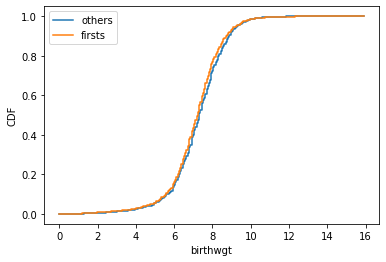

In [97]:
plt.step(list(others_cdf.keys()), list(others_cdf.values()), label="others")
plt.step(list(firsts_cdf.keys()), list(firsts_cdf.values()), label="firsts")
plt.xlabel("birthwgt")
plt.ylabel("CDF")
plt.legend()
plt.show()
plt.close()

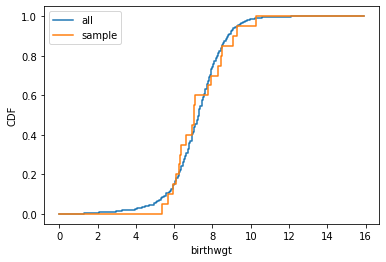

In [102]:
sample = np.random.choice(live_wgt_dropna, 20, replace=True) # 복원 추출. 같은 거 두 번 뽑을 수 있음.
sample_hist, sample_bins = np.histogram(sample, bins=np.arange(0, 16, 0.05))
sample_pmf = {key: val/len(sample) for key, val in zip(sample_bins, sample_hist)}
sample_cdf = pmf2cdf(sample_pmf)

plt.step(list(live_cdf.keys()), list(live_cdf.values()), label="all")
plt.step(list(sample_cdf.keys()), list(sample_cdf.values()), label="sample")
plt.xlabel("birthwgt")
plt.ylabel("CDF")
plt.legend()
plt.show()
plt.close()

# bin size랑 전체 sample 개수에 따라 그래프 모양 바뀜. 숫자 클수록 두 개 그래프가 비슷해짐

# Pandas indexing

In [104]:
array = np.random.randn(4, 2)    # 이렇게 하면 numpy의 2d array가 return됨
df = pd.DataFrame(array)
df

,0,1
0,-1.297508,0.600449
1,2.515933,0.943519
2,1.130509,0.075618
3,-1.170552,0.142617


In [106]:
columns = ["A", "B"]
df = pd.DataFrame(array, columns = columns)
df

,A,B
0,-1.297508,0.600449
1,2.515933,0.943519
2,1.130509,0.075618
3,-1.170552,0.142617


In [114]:
columns = ["A", "B"]
index = ["a", "b", "c", "d"]
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-1.297508,0.600449
b,2.515933,0.943519
c,1.130509,0.075618
d,-1.170552,0.142617


In [115]:
df["A"]

a   -1.297508
b    2.515933
c    1.130509
d   -1.170552
Name: A, dtype: float64

In [116]:
df.loc["a"]

A   -1.297508
B    0.600449
Name: a, dtype: float64

In [118]:
df.iloc[0]  # 위랑 똑같은 결과 나옴

A   -1.297508
B    0.600449
Name: a, dtype: float64

In [119]:
df.loc[["a", "c"]]

,A,B
a,-1.297508,0.600449
c,1.130509,0.075618


In [120]:
df.loc["a":"c"] # slicing 진행... 대신 이렇게 하면 "a"부터 "c"까지 나옴

,A,B
a,-1.297508,0.600449
b,2.515933,0.943519
c,1.130509,0.075618


In [121]:
df[0:2] # 이거 하면 0번째 index부터 2 전의 index까지 나옴

,A,B
a,-1.297508,0.600449
b,2.515933,0.943519
